<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 20px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #323c6a; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: Bold; margin-bottom: 10px; font-size: 36px;">🔥 Flood Prediction !</h1>
</div>

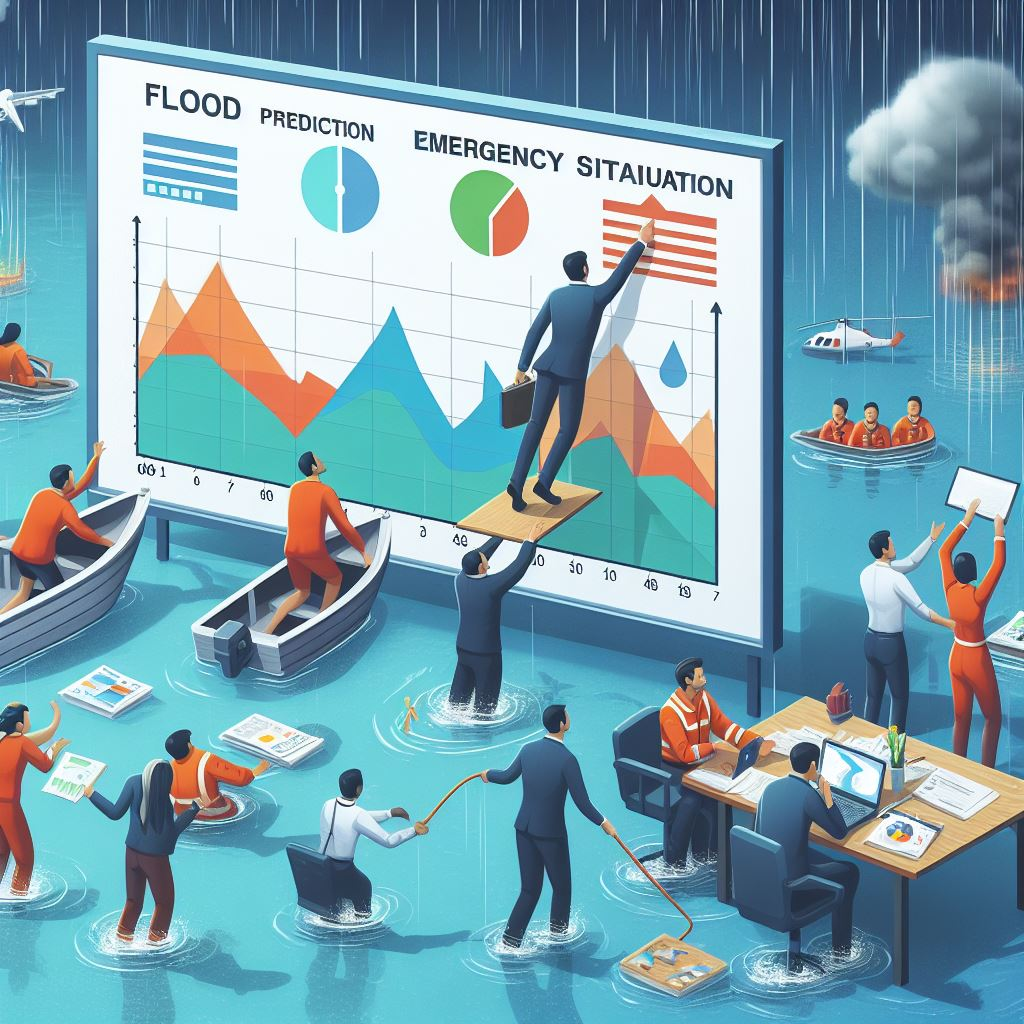

<div style="border: 2px solid #5388d0; padding: 10px; max-width: 1500px;">
    <p>
        I am <b>Saman Fatima</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I believe in the mantra of #KeepLearning and #KeepSupporting, as I am committed to constant growth and uplifting others in the field.
    </p>
    <div style="text-align: center;">
        <img src="https://media.licdn.com/dms/image/D4D03AQFAcZhjvE7C0Q/profile-displayphoto-shrink_800_800/0/1714558384812?e=1721260800&v=beta&t=vfqq1fnuYMej7Tpr_MGPhs1c9DuVyJHbzZT0XuacRds" alt="Profile Picture" style="width: 100px; height: 100px; border-radius: 50%; border: 2px solid #5388d0;"><br>
    </div>
    <p>
        You can find more about me on my <a href="https://www.linkedin.com/in/saman-fatima-datascience/" target="_blank">LinkedIn</a>.<br>
        Feel free to connect and reach out for any collaboration or queries!
    </p>
</div>

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 10px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #323c6a; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">🔥 Importing The Libraries </h1>
</div>


In [13]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting and visualization
from IPython.display import display, HTML  # Displaying HTML output in Jupyter notebooks
import warnings  # Suppress warnings
from colorama import Fore, Style  # Colored terminal text
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.model_selection import GridSearchCV, train_test_split  # Model selection and hyperparameter tuning
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer  # Data scaling and transformation
from sklearn.metrics import r2_score  # Model evaluation metric
from catboost import CatBoostRegressor  # CatBoost regression model

warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarning messages



<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 10px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #323c6a; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">🔥 Loading The Dataset </h1>
</div>


In [36]:
df_tr = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
df_ts = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')
df_s = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 10px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #323c6a; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">🔥 About The Dataset </h1>
</div>



## Code Explanation

- **Load the Test Data**
  - `X_test = df_ts`
    - Assigns the test data `df_ts` to the variable `X_test`.

- **Load the Submission IDs File**
  - `submission_ids = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')`
    - Loads the submission IDs file into a DataFrame named `submission_ids`. Make sure to replace `'submission_ids.csv'` with the actual filename.

- **Apply Quantile Transformer to the Test Data**
  - `X_test_scaled = scaler.transform(df_ts)`
    - Applies the same `QuantileTransformer` transformation that was fit on the training data to the test data `df_ts` to scale it.

- **Predict on the Test Set**
  - `y_pred = model.predict(X_test_scaled)`
    - Uses the trained `CatBoostRegressor` model to predict the flood probabilities for the test set.

- **Create a DataFrame for Submission**
  - `submission_df = pd.DataFrame({'id': submission_ids['id'], 'FloodProbability': y_pred})`
    - Creates a DataFrame `submission_df` with the submission IDs and the predicted flood probabilities.

- **Save the Submission DataFrame to a CSV File**
  - `submission_df.to_csv('submission_sss.csv', index=False)`
    - Saves the submission DataFrame to a CSV file named `'submission_sss.csv'` without including the index column.


In [46]:
# Helper function to generate colored horizontal line
def colored_line(color='#323c6a'):
    return f"<hr style='border: 2px solid {color};'>"

def print_dataset_analysis(train_dataset, test_dataset, n_top=5, heading_color='#323c6a', line_color='#323c6a'):
    # Printing top values
    train_heading = "<h2 style='color:{}; text-align:center;'><strong>🔝 Top {} rows of Training Dataset</strong></h2>".format(heading_color, n_top)
    test_heading = "<h2 style='color:{}; text-align:center;'><strong>🔝 Top {} rows of Test Dataset</strong></h2>".format(heading_color, n_top)

    display(HTML(colored_line(line_color)))
    display(HTML(train_heading))
    display(HTML(colored_line(line_color)))
    display(HTML(train_dataset.head(n_top).to_html()))

    display(HTML(colored_line(line_color)))
    display(HTML(test_heading))
    display(HTML(colored_line(line_color)))
    display(HTML(test_dataset.head(n_top).to_html()))
    
    # Printing dataset summary
    summary_heading = "<h2 style='color:{}; text-align:center;'><strong>📊 Summary of Dataset</strong></h2>".format(heading_color)
    display(HTML(colored_line(line_color)))
    display(HTML(summary_heading))
    display(HTML(colored_line(line_color)))
    display(HTML(train_dataset.describe().to_html()))

    # Printing null values
    null_heading = "<h2 style='color:{}; text-align:center;'><strong>❌ Null Values in Datasets</strong></h2>".format(heading_color)
    
    train_null_count = train_dataset.isnull().sum()
    test_null_count = test_dataset.isnull().sum()

    display(HTML(colored_line(line_color)))
    display(HTML(null_heading))
    display(HTML(colored_line(line_color)))
    display(HTML("<h3>Training Dataset:</h3>"))
    if train_null_count.sum() == 0:
        display(HTML("<p>No null values in the training dataset.</p>"))
    else:
        display(train_null_count[train_null_count > 0])
        display(HTML("<p>These are the null values.</p>"))

    display(HTML("<h3>Test Dataset:</h3>"))
    if test_null_count.sum() == 0:
        display(HTML("<p>No null values in the test dataset.</p>"))
    else:
        display(test_null_count[test_null_count > 0])
        display(HTML("<p>These are the null values.</p>"))

    # Printing duplicate values
    duplicate_heading = "<h2 style='color:{}; text-align:center;'><strong>♻️ Duplicate Values in Datasets</strong></h2>".format(heading_color)
    
    train_duplicates = train_dataset.duplicated().sum()
    test_duplicates = test_dataset.duplicated().sum()

    display(HTML(colored_line(line_color)))
    display(HTML(duplicate_heading))
    display(HTML(colored_line(line_color)))
    display(HTML("<h3>Training Dataset:</h3>"))
    display(train_duplicates)

    display(HTML("<h3>Test Dataset:</h3>"))
    display(test_duplicates)
    
    # Printing number of rows and columns
    shape_heading = "<h2 style='color:{}; text-align:center;'><strong>📏 Number of Rows and Columns</strong></h2>".format(heading_color)
    display(HTML(colored_line(line_color)))
    display(HTML(shape_heading))
    display(HTML(colored_line(line_color)))
    display(HTML("<h3>Training Dataset:</h3>"))
    display(HTML(f"<p>Rows: {train_dataset.shape[0]}, Columns: {train_dataset.shape[1]}</p>"))
    display(HTML("<h3>Test Dataset:</h3>"))
    display(HTML(f"<p>Rows: {test_dataset.shape[0]}, Columns: {test_dataset.shape[1]}</p>"))

def print_unique_values(test_dataset, heading_color='#323c6a', line_color='#323c6a'):
    unique_values_heading = "<h2 style='color:{}; text-align:center;'><strong>🔢 Unique Values in Test Dataset</strong></h2>".format(heading_color)
    
    display(HTML(colored_line(line_color)))
    display(HTML(unique_values_heading))
    display(HTML(colored_line(line_color)))
    
    unique_values_table = "<table border='1'><tr><th>Column Name</th><th>Data Type</th><th>Unique Values</th></tr>"
    
    for column in test_dataset.columns:
        unique_values = test_dataset[column].unique()[:7]  # Taking at least 7 unique values
        unique_values_str = ', '.join(map(str, unique_values))
        data_type = test_dataset[column].dtype
        unique_values_table += f"<tr><td>{column}</td><td>{data_type}</td><td>{unique_values_str}</td></tr>"
    
    unique_values_table += "</table>"
    display(HTML(unique_values_table))


In [22]:
#df_tr` is your training dataset and `df_ts` is your test dataset
print_dataset_analysis(df_tr, df_ts, n_top=5, heading_color='#323c6a', line_color='#323c6a')
print_unique_values(df_ts, heading_color='#323c6a', line_color='#323c6a')

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,4.945239e+00,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,2.078141e+00,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


0

0

Column Name,Data Type,Unique Values
id,int64,"1117957, 1117958, 1117959, 1117960, 1117961, 1117962, 1117963"
MonsoonIntensity,int64,"4, 1, 2, 6, 3, 5, 7"
TopographyDrainage,int64,"6, 4, 3, 5, 9, 8, 2"
RiverManagement,int64,"3, 2, 6, 4, 8, 1, 5"
Deforestation,int64,"5, 9, 6, 4, 8, 1, 2"
Urbanization,int64,"6, 5, 7, 4, 3, 8, 1"
ClimateChange,int64,"7, 5, 2, 4, 3, 6, 1"
DamsQuality,int64,"8, 4, 5, 2, 3, 7, 6"
Siltation,int64,"7, 6, 3, 5, 8, 1, 4"
AgriculturalPractices,int64,"8, 5, 4, 3, 9, 10, 2"


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 10px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #323c6a; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">🔥 Visualization Of The Dataset </h1>
</div>


# **Working Of The Code** 
- **Function Definition**: This function, named `create_histograms`, takes a DataFrame `df` as input.
- **Numerical Columns Selection**: It selects only the numerical columns from the DataFrame using `df.select_dtypes(include=['int64', 'float']).columns`.
- **Subplots Setup**: It calculates the number of rows and columns needed for subplots based on the number of numerical columns. It ensures that there are enough rows for the subplots by adding 2 before dividing by 3. The number of columns is fixed at 3.
- **Subplots Creation**: It creates subplots using `plt.subplots` with the specified number of rows and columns. The size of the figure is adjusted based on the number of rows to ensure proper visualization.
- **Histogram Plotting**: It iterates over each numerical column and plots a histogram using `sns.histplot`. It specifies the number of bins as 20, color as `#c9e6f6`, edgecolor as black, and includes a kernel density estimation (KDE) curve.
- **Mean and Median Lines**: For each histogram, it adds vertical dashed lines representing the mean and median values of the column. The mean line is green, and the median line is purple.
- **Axis Labels and Title**: It sets the title of each subplot as "Distribution of [column_name]" with a specified font size and weight. It also sets the x-axis label as the column name and the y-axis label as "Frequency" with specified font sizes.
- **Legend and Grid**: It adds a legend to each subplot indicating the mean and median values, with specified font size. It also adds grid lines along the y-axis for better readability.
- **Empty Subplot Handling**: Any empty subplots are hidden to avoid clutter.
- **Layout Adjustment and Display**: It adjusts the layout of the subplots for better spacing using `plt.tight_layout()` and finally displays the plots using `plt.show()`.


In [47]:
def create_histograms(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float']).columns
    
    # Calculate number of rows and columns for subplots
    num_plots = len(numerical_columns)
    num_rows = (num_plots + 2) // 3  # Add 2 before dividing to ensure we have enough rows
    num_cols = 3  # Update number of columns for subplots
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))  # Adjust figsize for three plots per row
    axs = axs.flatten()  # Flatten the axs array to simplify indexing
    
    # Plot histograms
    for i, col in enumerate(numerical_columns):
        sns.histplot(data=df, x=col, bins=20, color='#c9e6f6', edgecolor='black', kde=True, ax=axs[i])  # Changed color and edgecolor
        
        mean_value = df[col].mean()
        median_value = df[col].median()
        
        axs[i].axvline(mean_value, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')  # Changed color
        axs[i].axvline(median_value, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')  # Changed color
        
        axs[i].set_title(f"Distribution of {col} ", fontsize=16, fontweight='bold')  # Changed title font size and weight
        axs[i].set_xlabel(col, fontsize=12)  # Changed x-axis label font size
        axs[i].set_ylabel("Frequency", fontsize=12)  # Changed y-axis label
        
        axs[i].legend(fontsize=10)  # Changed legend font size
        
        axs[i].grid(axis='y', color='gray')  # Added grid lines for better readability
        
    # Hide empty subplots
    for j in range(num_plots, num_rows * num_cols):
        axs[j].axis('off')
        
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show() 

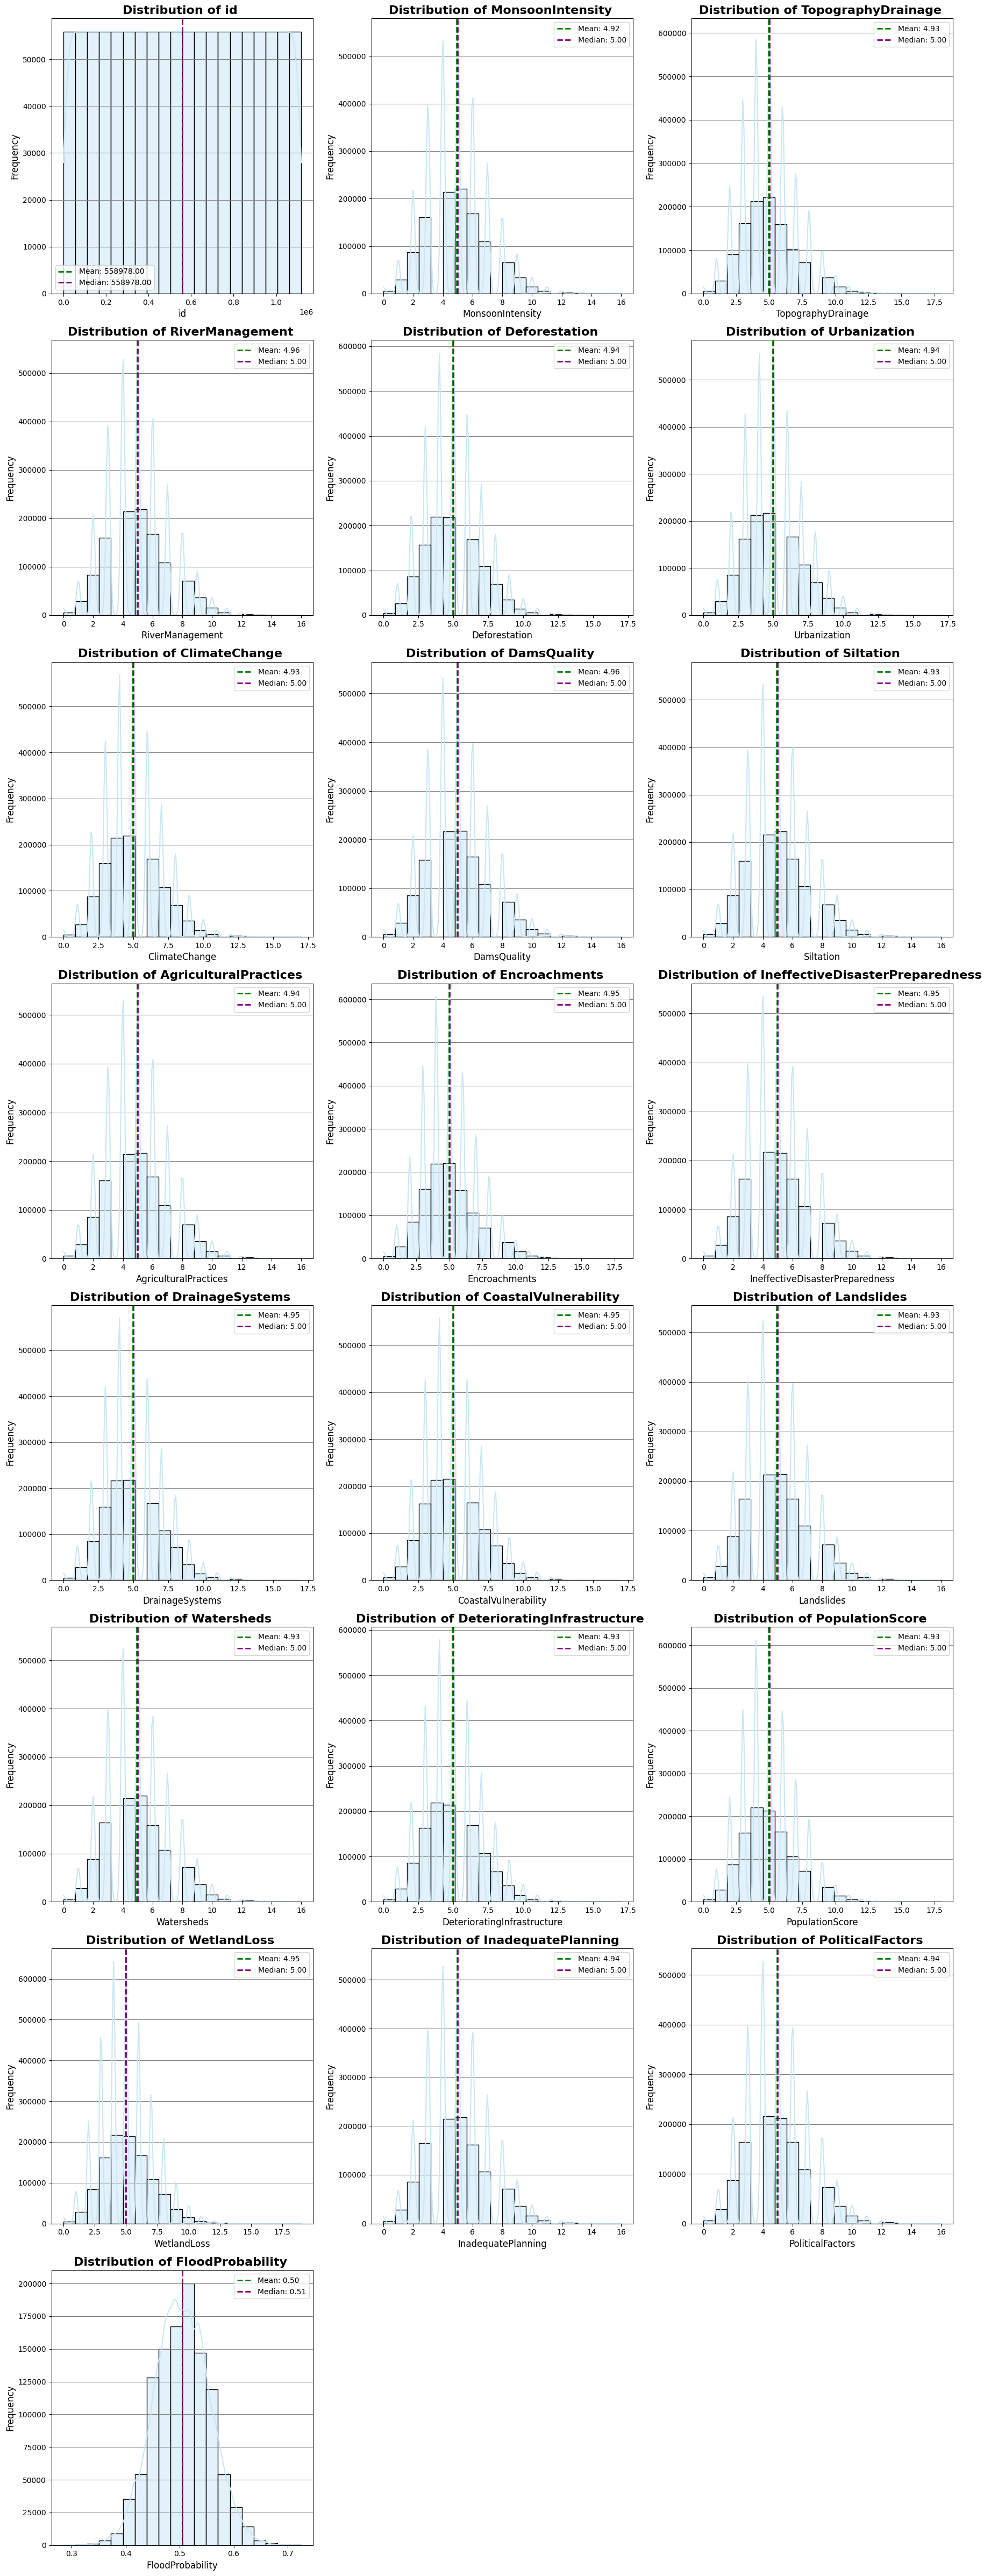

In [48]:
create_histograms(df_tr)
 

## Function Explanation: `create_boxplots(df)`

- **Select Numerical Columns**
  - `numerical_columns = df.select_dtypes(include=['int64', 'float']).columns`
  - Identifies and selects all columns in the DataFrame `df` that are of integer (`int64`) or float data type.

- **Calculate Number of Rows and Columns for Subplots**
  - `num_plots = len(numerical_columns)`
    - Counts the total number of numerical columns to determine how many plots will be needed.
  - `num_rows = (num_plots + 2) // 3`
    - Calculates the number of rows needed for the subplots. Adds 2 before dividing by 3 to ensure there are enough rows.
  - `num_cols = 3`
    - Sets the number of columns for the subplots to 3.

- **Create Subplots**
  - `fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))`
    - Creates a figure and subplots with a specified size. The figure size is adjusted to fit three plots per row.
  - `axs = axs.flatten()`
    - Flattens the array of subplots for simpler indexing.

- **Plot Box Plots**
  - `for i, col in enumerate(numerical_columns):`
    - Iterates through each numerical column and its index.
    - `sns.boxplot(data=df[col], ax=axs[i], color='#c9e6f6')`
      - Creates a box plot for the current column with a specified color.
    - `mean_value = df[col].mean()`
      - Calculates the mean value of the current column.
    - `median_value = df[col].median()`
      - Calculates the median value of the current column.
    - `axs[i].axhline(mean_value, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')`
      - Adds a horizontal dashed line at the mean value in green.
    - `axs[i].axhline(median_value, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')`
      - Adds a horizontal dashed line at the median value in purple.
    - `axs[i].set_title(f"Boxplot of {col} ", fontsize=16, fontweight='bold')`
      - Sets the title of the plot with a specific font size and weight.
    - `axs[i].set_xlabel(col, fontsize=12)`
      - Sets the x-axis label with a specific font size.
    - `axs[i].set_ylabel("Value", fontsize=12)`
      - Sets the y-axis label with a specific font size.
    - `axs[i].legend(fontsize=10)`
      - Adds a legend to the plot with a specific font size.

- **Hide Empty Subplots**
  - `for j in range(num_plots, num_rows * num_cols):`
    - Iterates over the remaining subplot spaces.
    - `axs[j].axis('off')`
      - Hides any unused subplot axes.

- **Adjust Layout**
  - `plt.tight_layout()`
    - Adjusts the layout of the plots for better spacing and to prevent overlap.
  - `plt.show()`
    - Displays the created plots.


In [49]:
def create_boxplots(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float']).columns
    
    # Calculate number of rows and columns for subplots
    num_plots = len(numerical_columns)
    num_rows = (num_plots + 2) // 3  # Add 2 before dividing to ensure we have enough rows
    num_cols = 3  # Update number of columns for subplots
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))  # Adjust figsize for three plots per row
    axs = axs.flatten()  # Flatten the axs array to simplify indexing
    
    # Plot box plots
    for i, col in enumerate(numerical_columns):
        sns.boxplot(data=df[col], ax=axs[i], color='#c9e6f6')  # Changed color
        
        mean_value = df[col].mean()
        median_value = df[col].median()
        
        axs[i].axhline(mean_value, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')  # Changed color
        axs[i].axhline(median_value, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')  # Changed color
        
        axs[i].set_title(f"Boxplot of {col} ", fontsize=16, fontweight='bold')  # Changed title font size and weight
        axs[i].set_xlabel(col, fontsize=12)  # Changed x-axis label font size
        axs[i].set_ylabel("Value", fontsize=12)  # Changed y-axis label
        
        axs[i].legend(fontsize=10)  # Changed legend font size
        
    # Hide empty subplots
    for j in range(num_plots, num_rows * num_cols):
        axs[j].axis('off')
        
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()




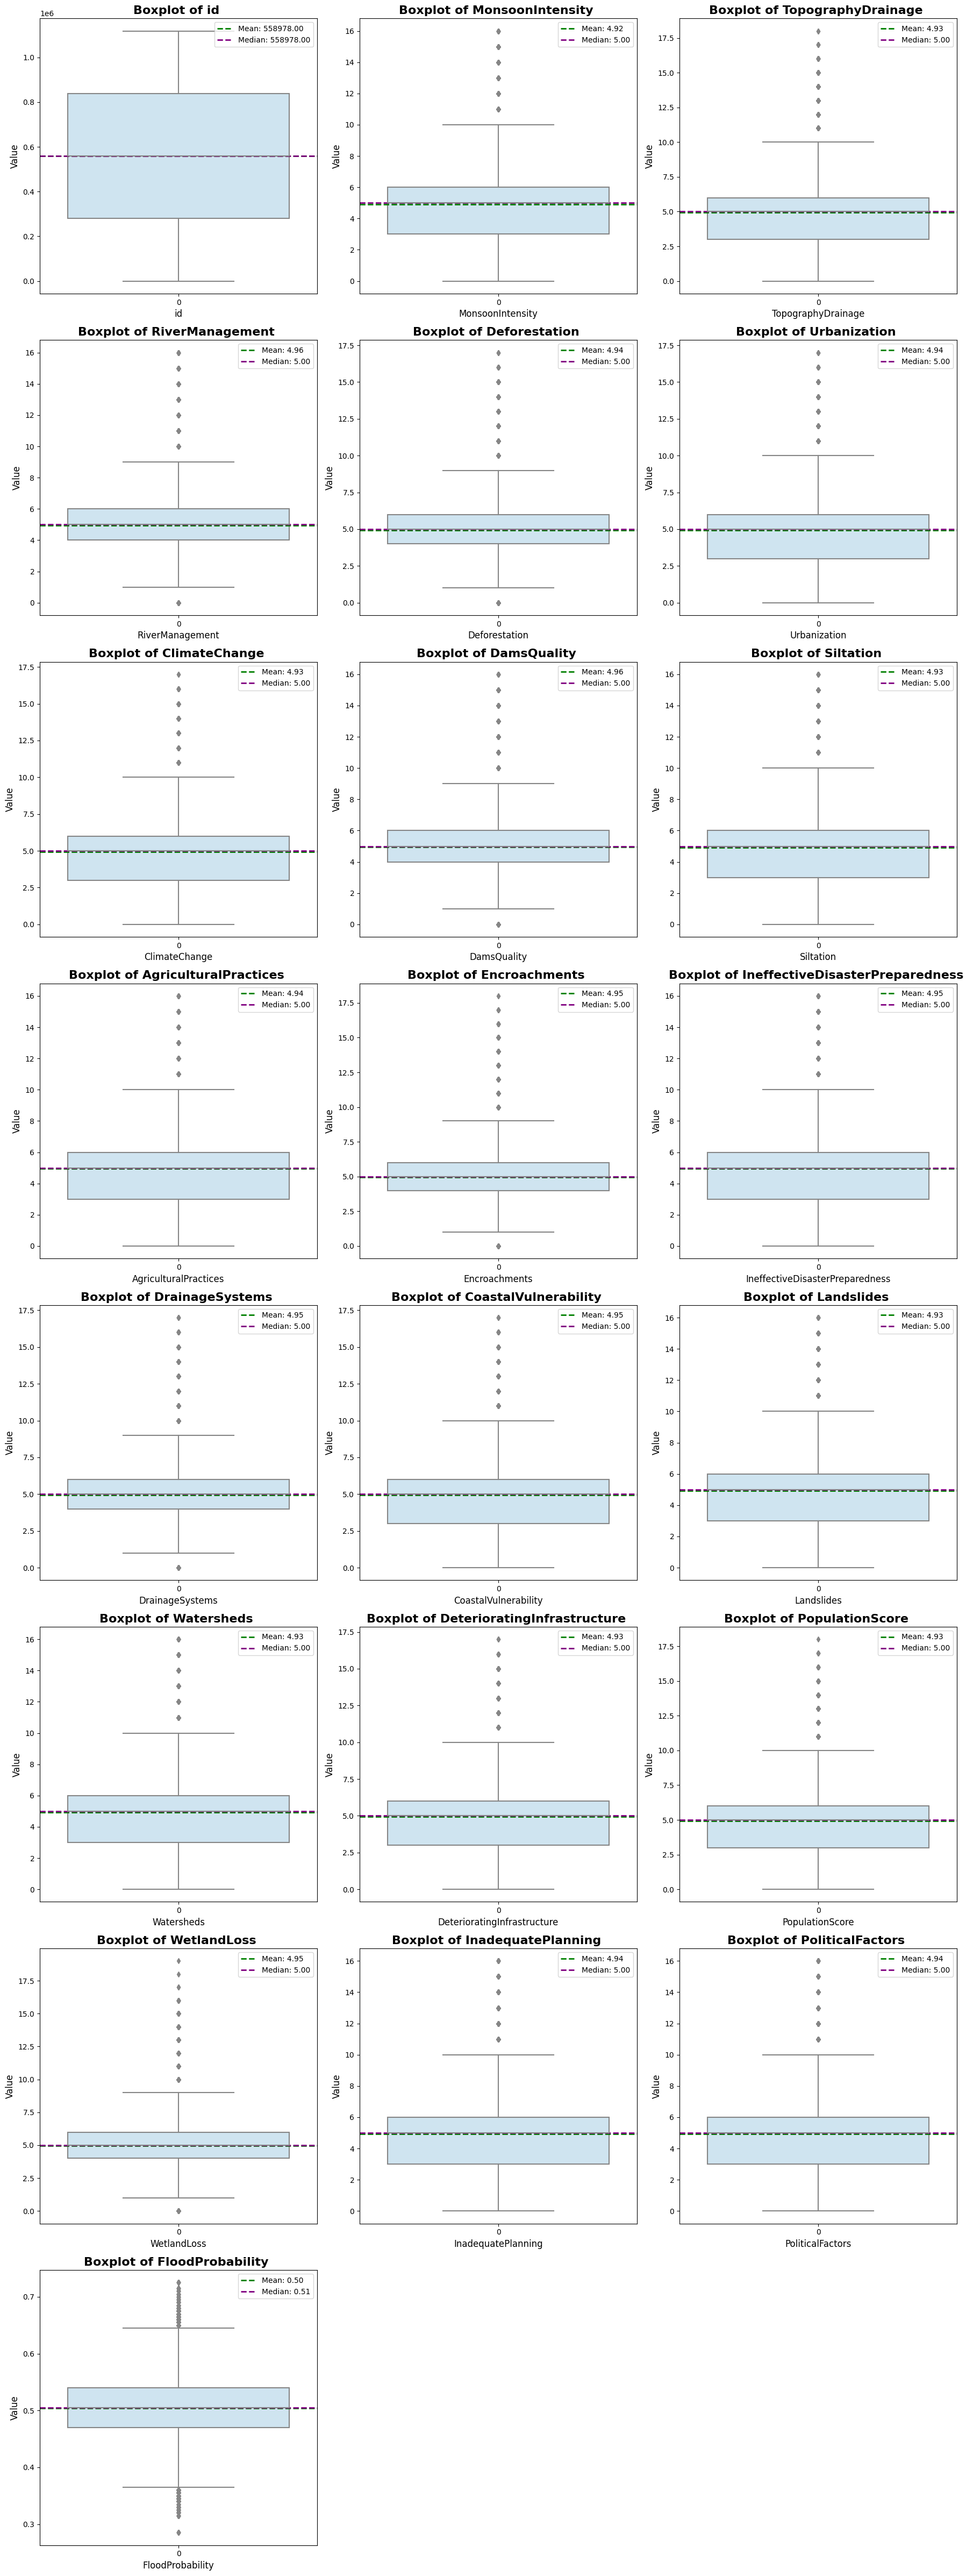

In [50]:
create_boxplots(df_tr)

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 20px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #323c6a; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: Bold; margin-bottom: 10px; font-size: 36px;"> 🔥Modeling  </h1>
</div>

## Code Explanation

- **Split Data into Features (X) and Target (y)**
  - `X = df_tr.drop(columns=['FloodProbability'], axis=1)`
    - Drops the 'FloodProbability' column from `df_tr` to create the feature set `X`.
  - `y = df_tr['FloodProbability']`
    - Sets the target variable `y` to the 'FloodProbability' column.

- **Apply Quantile Transformer to X**
  - `scaler = QuantileTransformer()`
    - Initializes a `QuantileTransformer` object for scaling the data.
  - `X_scaled = scaler.fit_transform(X)`
    - Fits the `QuantileTransformer` to `X` and transforms `X` to `X_scaled`.

- **Split the Scaled Data into Training and Testing Sets**
  - `X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)`
    - Splits the scaled feature set and the target variable into training and testing sets with 80% for training and 20% for testing.

- **Set Up the CatBoostRegressor with the Obtained Hyperparameters**
  - `model = CatBoostRegressor(iterations=397, learning_rate=0.1260562730781983, depth=10, l2_leaf_reg=0.1659509822594642, bootstrap_type='Bernoulli', colsample_bylevel=0.22467859548528388, verbose=False)`
    - Initializes the `CatBoostRegressor` with specified hyperparameters, setting `verbose` to `False` to suppress training logs.

- **Fit the CatBoostRegressor with the Training Data**
  - `model.fit(X_train, y_train)`
    - Fits the `CatBoostRegressor` model to the training data.

- **Predict on the Test Set**
  - `y_pred = model.predict(X_test)`
    - Uses the trained model to make predictions on the test set.

- **Evaluate the Model**
  - `r2 = r2_score(y_test, y_pred)`
    - Calculates the R-squared score to evaluate the model's performance.
  - `print("R-squared on test set: ", r2)`
    - Prints the R-squared score for the test set.


In [53]:
# Split data into features (X) and target (y)
X = df_tr.drop(columns=['FloodProbability'], axis=1)
y = df_tr['FloodProbability']

# Apply Quantile Transformer to X
scaler = QuantileTransformer()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Set up the CatBoostRegressor with the obtained hyperparameters
model = CatBoostRegressor(iterations=397,
                           learning_rate=0.1260562730781983,
                           depth=10,
                           l2_leaf_reg=0.1659509822594642,
                           bootstrap_type='Bernoulli',
                           colsample_bylevel=0.22467859548528388,
                           verbose=False)  # Set verbose to True if you want to see training logs

# Fit the CatBoostRegressor with the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print("R-squared on test set: ", r2)


R-squared on test set:  0.8455514142920759


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 10px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #323c6a; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">🔥 Submission File  </h1>
</div>


## Code Explanation

- **Load the Test Data**
  - `X_test = df_ts`
    - Assigns the test data `df_ts` to the variable `X_test`.

- **Load the Submission IDs File**
  - `submission_ids = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')`
    - Loads the submission IDs file into a DataFrame named `submission_ids`. Make sure to replace `'submission_ids.csv'` with the actual filename.

- **Apply Quantile Transformer to the Test Data**
  - `X_test_scaled = scaler.transform(df_ts)`
    - Applies the same `QuantileTransformer` transformation that was fit on the training data to the test data `df_ts` to scale it.

- **Predict on the Test Set**
  - `y_pred = model.predict(X_test_scaled)`
    - Uses the trained `CatBoostRegressor` model to predict the flood probabilities for the test set.

- **Create a DataFrame for Submission**
  - `submission_df = pd.DataFrame({'id': submission_ids['id'], 'FloodProbability': y_pred})`
    - Creates a DataFrame `submission_df` with the submission IDs and the predicted flood probabilities.

- **Save the Submission DataFrame to a CSV File**
  - `submission_df.to_csv('submission_sss.csv', index=False)`
    - Saves the submission DataFrame to a CSV file named `'submission_sss.csv'` without including the index column.


In [41]:
# Load the test data
X_test = df_ts

# Load the submission IDs file
submission_ids = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')  # Replace 'submission_ids.csv' with the actual filename

# Apply Quantile Transformer to the test data 
X_test_scaled = scaler.transform(df_ts)  

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'id': submission_ids['id'], 'FloodProbability': y_pred})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_sss.csv', index=False)


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 20px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #323c6a; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: Bold; margin-bottom: 10px; font-size: 36px;"> The End :) </h1>
</div>